## Name: Nick Darrow
## UIN: 01178936
## Class: CS625
## Assignment HW4
## Date: 03/19/25


In [7]:
#mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Dataset 3, Q1
#import proper libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import data
HTRSC = pd.read_csv("/content/10s0379.csv")
pd.DataFrame(HTRSC)
HTRSC.head(10)


,State,Station,Length of record (years),Annual \1,Month,Temprature
0,Alabama,Mobile,66,105,January,84
1,Alabama,Mobile,66,105,February,82
2,Alabama,Mobile,66,105,March,90
3,Alabama,Mobile,66,105,April,94
4,Alabama,Mobile,66,105,May,100
5,Alabama,Mobile,66,105,June,102
6,Alabama,Mobile,66,105,July,104
7,Alabama,Mobile,66,105,August,105
8,Alabama,Mobile,66,105,September,99
9,Alabama,Mobile,66,105,October,93


In [17]:
#isolating the 5 cities we want to run analysis on
# for this I chose the 5 top populated cities in the US
selected_cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
Top5Cities = HTRSC[HTRSC['Station'].isin(selected_cities)]
Top5Cities.head(30)

,State,Station,Length of record (years),Annual \1,Month,Temprature
24,Arizona,Phoenix,70,122,January,88
25,Arizona,Phoenix,70,122,February,92
26,Arizona,Phoenix,70,122,March,100
27,Arizona,Phoenix,70,122,April,105
28,Arizona,Phoenix,70,122,May,113
29,Arizona,Phoenix,70,122,June,122
30,Arizona,Phoenix,70,122,July,121
31,Arizona,Phoenix,70,122,August,116
32,Arizona,Phoenix,70,122,September,118
33,Arizona,Phoenix,70,122,October,107


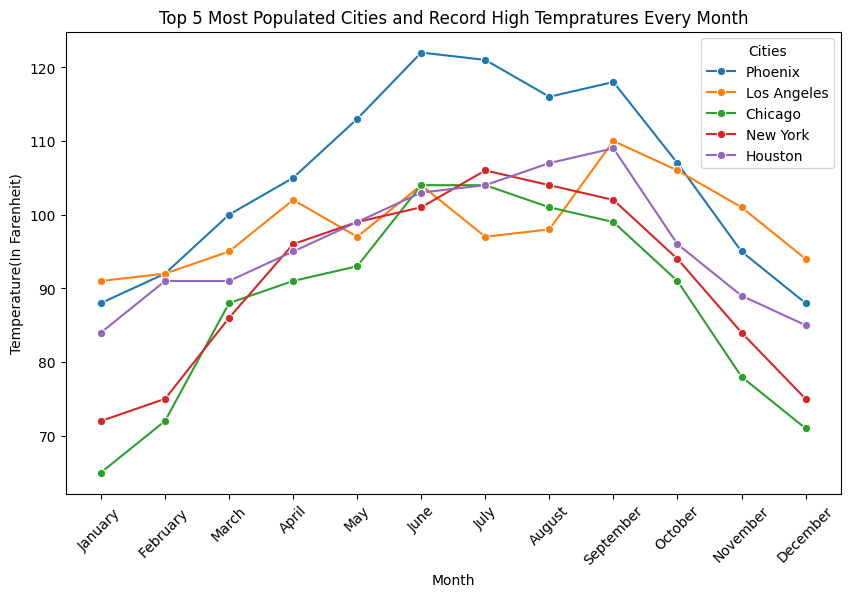

In [24]:
#Multiple Line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=Top5Cities, x='Month', y='Temprature', hue='Station', marker='o')
plt.title("Top 5 Most Populated Cities and Record High Tempratures Every Month")
plt.xlabel("Month")
plt.ylabel("Temperature(In Farenheit)")
plt.xticks(rotation=45)
plt.legend(title="Cities")
plt.savefig('Top5Cities.png', dpi=300, bbox_inches='tight')
plt.show()


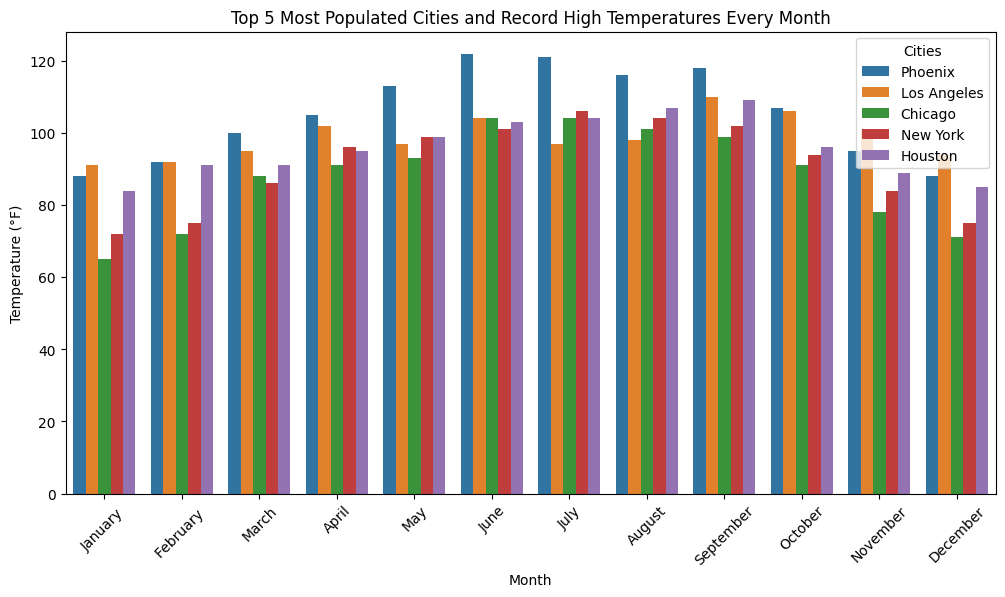

In [20]:
#Version as a clustered bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=Top5Cities, x='Month', y='Temprature', hue='Station', dodge=True)

plt.title("Top 5 Most Populated Cities and Record High Temperatures Every Month")
plt.xlabel("Month")
plt.ylabel("Temperature (°F)")
plt.xticks(rotation=45)
plt.legend(title="Cities")
plt.show()

<ipython-input-45-384ecdbd093c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_counts, x='Month', y='Count', palette='viridis')


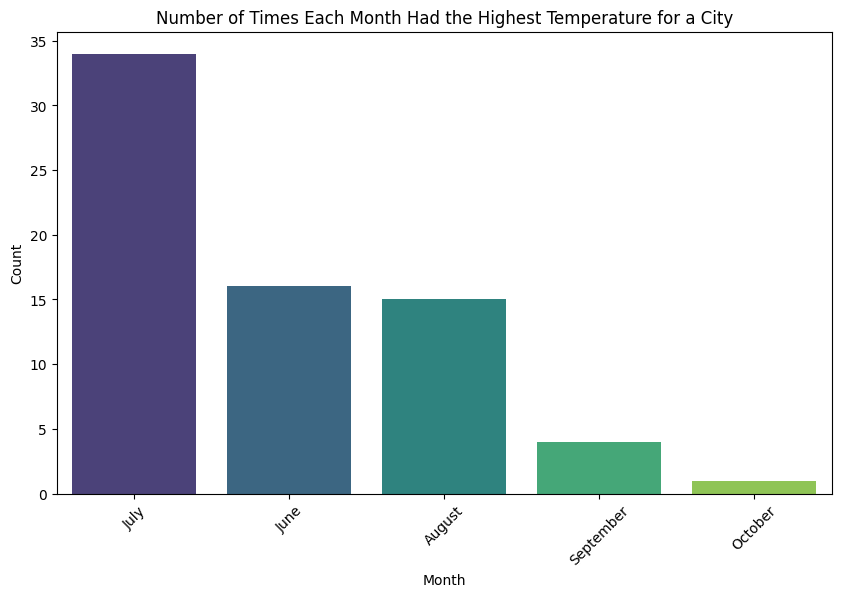

In [45]:
#dataset 3 Q2
city_max_temperatures = HTRSC.loc[HTRSC.groupby('Station')['Temprature'].idxmax()]

month_counts = city_max_temperatures['Month'].value_counts().reset_index()
month_counts.columns = ['Month', 'Count']
#above code was helped on with AI

plt.figure(figsize=(10, 6))
sns.barplot(data=month_counts, x='Month', y='Count', palette='viridis')
plt.title('Number of Times Each Month Had the Highest Temperature for a City')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('highesttemps.jpg', dpi=300, bbox_inches='tight')
plt.show()
